In [1]:
import pandas as pd

In [2]:
df_covid = pd.read_csv('D:/Sawitpro/owid-covid-data.csv')

In [19]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295676 entries, 0 to 295675
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    295676 non-null  object 
 1   continent                                   281648 non-null  object 
 2   location                                    295676 non-null  object 
 3   date                                        295676 non-null  object 
 4   total_cases                                 260181 non-null  float64
 5   new_cases                                   287376 non-null  float64
 6   new_cases_smoothed                          286112 non-null  float64
 7   total_deaths                                239801 non-null  float64
 8   new_deaths                                  287484 non-null  float64
 9   new_deaths_smoothed                         286254 non-null  float64
 

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
df_covid.isna().sum()

iso_code                                           0
continent                                      14028
location                                           0
date                                               0
total_cases                                    35495
new_cases                                       8300
new_cases_smoothed                              9564
total_deaths                                   55875
new_deaths                                      8192
new_deaths_smoothed                             9422
total_cases_per_million                        35495
new_cases_per_million                           8300
new_cases_smoothed_per_million                  9564
total_deaths_per_million                       55875
new_deaths_per_million                          8192
new_deaths_smoothed_per_million                 9422
reproduction_rate                             110859
icu_patients                                  263226
icu_patients_per_million                      

In [7]:
df_covid.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
46663,CPV,Africa,Cape Verde,2022-12-07,63107.0,12.0,10.000,412.0,0.0,0.000,106390.834,20.231,16.859,694.583,0.000,0.000,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,135.580,25.7,4.460,3.437,6222.554,NaN,182.219,2.42,2.1,16.5,NaN,2.10,72.98,0.665,593162.0,NaN,NaN,NaN,NaN
52699,COL,South America,Colombia,2020-04-02,906.0,108.0,88.286,16.0,2.0,1.857,17.465,2.082,1.702,0.308,0.039,0.036,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.96,44.223,32.2,7.646,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
115710,HUN,Europe,Hungary,2020-03-31,492.0,45.0,43.571,16.0,1.0,1.143,49.361,4.515,4.371,1.605,0.100,0.115,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13916.0,845.0,1.433,0.087,1148.0,0.118,0.0380,26.3,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.85,108.043,43.4,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02,76.88,0.854,9967304.0,NaN,NaN,NaN,NaN
53158,COL,South America,Colombia,2021-07-05,4324230.0,26928.0,28270.000,108314.0,591.0,614.286,83360.213,519.104,544.974,2088.020,11.393,11.842,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20384574.0,50359.0,395.690,0.978,105497.0,2.048,0.2890,3.5,tests performed,19436143.0,12084403.0,7624099.0,NaN,171292.0,266459.0,37.47,23.30,14.70,NaN,5137.0,128128.0,0.247,59.26,44.223,32.2,7.646,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
121863,IRQ,Asia,Iraq,2021-02-02,620620.0,984.0,863.429,13057.0,10.0,8.143,13947.732,22.114,19.405,293.441,0.225,0.183,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5706337.0,45290.0,131.079,1.040,40170.0,0.923,0.0227,44.1,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,88.125,20.0,3.186,1.957,15663.986,2.5,218.612,8.83,NaN,NaN,94.576,1.40,70.60,0.674,44496124.0,NaN,NaN,NaN,NaN
127306,ITA,Europe,Italy,2023-03-10,25627473.0,3829.0,3423.286,188538.0,36.0,30.857,434088.252,64.857,57.985,3193.531,0.610,0.523,NaN,91.0,1.541,2993.0,50.697,75.0,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143815292.0,50887290.0,47974952.0,46952676.0,1572.0,1179.0,243.60,86.19,81.26,79.53,20.0,31.0,0.000,NaN,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
151875,MAC,Asia,Macao,2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,388.0,NaN,NaN

In [151]:
df = df_covid.copy()

In [84]:
df['date'] = pd.to_datetime(df['date'])

In [92]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [105]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295671,ZWE,Africa,Zimbabwe,2023-03-12,264385.0,13.0,16.429,5672.0,0.0,0.143,16199.526,0.797,1.007,347.538,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295672,ZWE,Africa,Zimbabwe,2023-03-13,264391.0,6.0,16.429,5672.0,0.0,0.143,16199.894,0.368,1.007,347.538,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295673,ZWE,Africa,Z

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295676 entries, 0 to 295675
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    295676 non-null  object        
 1   continent                                   281648 non-null  object        
 2   location                                    295676 non-null  object        
 3   date                                        295676 non-null  datetime64[ns]
 4   total_cases                                 260181 non-null  float64       
 5   new_cases                                   287376 non-null  float64       
 6   new_cases_smoothed                          286112 non-null  float64       
 7   total_deaths                                239801 non-null  float64       
 8   new_deaths                                  287484 non-null  float64      

In [113]:
df[df.location=='France'].date.dt.year.unique()

array([2020, 2021, 2022, 2023], dtype=int64)

In [139]:
df = df_covid.copy()

In [141]:
df_sample = df[['location','total_deaths','total_cases','date','median_age','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','tests_per_case','tests_units']]
df_sample.dropna(inplace=True)

C:\Users\fachr\AppData\Local\Temp\ipykernel_44804\1044844373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.dropna(inplace=True)


In [144]:
df_sample.sample(10)

,location,total_deaths,total_cases,date,median_age,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case,tests_units
281947,Uruguay,30.0,986.0,2020-07-13,35.6,79033.0,1377.0,23.067,0.402,260.9,people tested
282274,Uruguay,4460.0,304411.0,2021-06-05,35.6,2378828.0,32319.0,694.293,9.433,6.1,people tested
170702,Mongolia,438.0,100263.0,2021-06-23,28.6,3178573.0,11681.0,949.456,3.489,4.8,samples tested
241252,Slovenia,3938.0,172231.0,2021-02-05,44.5,830154.0,4541.0,391.691,2.143,5.4,tests performed
140656,Latvia,2139.0,119370.0,2021-05-01,43.9,2258536.0,12637.0,1205.247,6.744,21.4,tests performed
250424,Sri Lanka,11.0,2844.0,2020-08-09,34.1,172972.0,1803.0,7.944,0.083,445.0,tests performed
280133,United States Virgin Islands,88.0,7640.0,2021-12-19,42.2,96766.0,27.0,966.780,0.270,27.0,tests performed
281995,Uruguay,43.0,1556.0,2020-08-30,35.6,171151.0,844.0,49.953,0.246,204.6,people tested
15369,Australia,107.0,7436.0,2020-06-21,37.9,2041324.0,35946.0,78.751,1.387,1618.0,tests performed
207835,Philippines,58563.0,3675379.0,2022-03-24,25.2,27123459.0,24244.0,238.175,0.213,47.4,people tested


In [145]:
for i in df.columns:
    if 'age' in i:
        print(i)

median_age
aged_65_older
aged_70_older


In [149]:
df.date = pd.to_datetime(df.date)

# Q1 - What is the probability of dying from COVID infection in France in March 2023 for a 25 year old? Draw the relevant correlation projections

Based on https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(21)02867-1/fulltext journal on Variation in the COVID-19 infection–fatality ratio by age, time, and geography during the pre-vaccine era: a systematic analysis,
the Infection Fatality Rate of people aged 25 are *0.0293%*
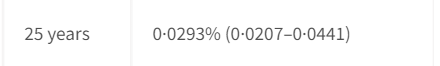

In [150]:
import pandas as pd

# Filter the dataset to include only data for France in March 2023
france_march_2023 = df[(df['location'] == 'France') & (df['date'].dt.year==2023)&(df.date.dt.month==3)]

# Calculate the case fatality rate (CFR) for COVID-19 in France in March 2023
cfr = france_march_2023['total_deaths'].sum() / france_march_2023['total_cases'].sum()

# Estimate the probability of dying from COVID-19 for a 25-year-old
ifr_25 = 0.000293 # Assuming an IFR of 0.03% for 25-year-olds
prob_death_25 = cfr * ifr_25

print("The probability of dying from COVID-19 in France in March 2023 for a 25-year-old is:", prob_death_25)


The probability of dying from COVID-19 in France in March 2023 for a 25-year-old is: 1.2269043910530575e-06


# Q2 - What is the correlation between the number of deaths with age for the US, China, France and Germany?

In [76]:

# Filter the data to only include the countries of interest and the relevant columns
countries = ['United States', 'China', 'France', 'Germany']
columns = ['location', 'date', 'total_deaths', 'median_age']
countries_data = df[df['location'].isin(countries)][columns]
countries_data.dropna(inplace=True)
# Calculate the correlation between deaths and age_65_older for each country
correlations = {}
for country in countries:
    country_data = countries_data[countries_data['location'] == country]
    correlation = country_data['total_deaths'].corr(country_data['median_age'])
    correlations[country] = correlation

# Print the correlations
for country, correlation in correlations.items():
    print(f"The correlation between deaths and median_age in {country} is {correlation:.60f}.")


The correlation between deaths and median_age in United States is 0.000000000000000557570920753889752794953128043851396536318462.
The correlation between deaths and median_age in China is -0.000000000000000491489084375854032988850533081212113679656973.
The correlation between deaths and median_age in France is nan.
The correlation between deaths and median_age in Germany is 0.000000000000000058508764105276193444740232645231952799132311.


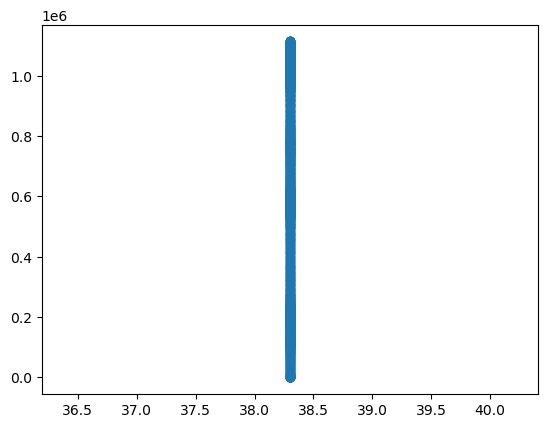

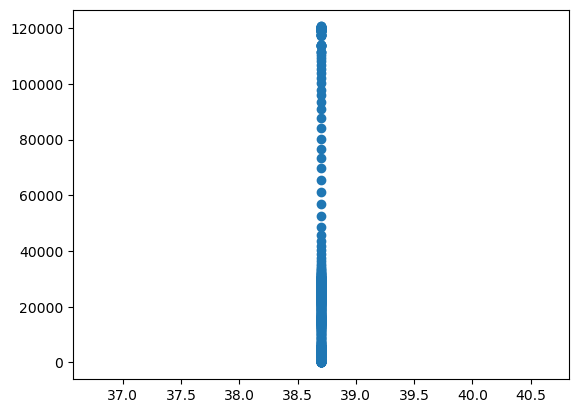

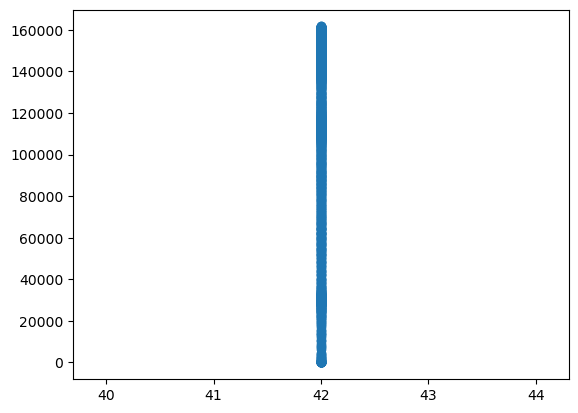

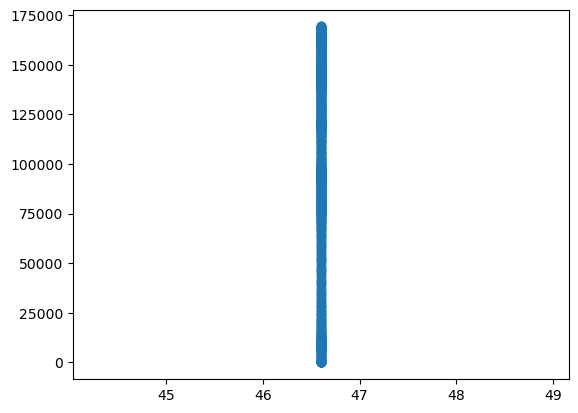

In [79]:
for country in countries:
    country_data = countries_data[countries_data['location'] == country]
    plt.scatter(x=country_data.median_age,y=country_data.total_deaths)
    plt.show()